# 1. Gradient Boosting Regression on the California Housing Dataset
    o Dataset: Use the California Housing Dataset from sklearn.datasets.
    o Tasks:
        1. Load and split the dataset into training and testing sets (70% train, 30% test).
        2. Initialize a Gradient Boosting Regressor with n_estimators=200 and experiment with learning_rate values of 0.01, 0.1, and 0.2. Squared Error (MSE) and R² score.
        4. Plot MSE as a function of the number of boosting iterations for each learning rate.
        5. Summarize how learning rate impacts model performance, explaining underfitting or overfitting at different rates.

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
# fetch dataset 
california_housing = fetch_california_housing()
  
# data (as pandas dataframes) 
X = california_housing.data 
y = california_housing.target

print(X.shape) 
print(y.shape)

(20640, 8)
(20640,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, random_state=42, learning_rate=0.01)

# Train the Gradient Boosting Regressor on the training data
gbr.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)

In [6]:
y_pred = gbr.predict(x_test_scaled)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4886202212344847
R^2 Score: 0.6277293026509343


# 2. Gradient Boosting Classification on the Wine Quality Dataset
    o Dataset: Use the Wine Quality Dataset from the UCI repository or Kaggle.
    o Tasks:
        1. Load the Wine Quality dataset, and convert the quality column into a binary classification: “high” (≥ 7) and “low” (< 7).
        2. Split the data into training and testing sets (75% train, 25% test).
        3. Initialize a Gradient Boosting Classifier with n_estimators=150.
        4. Experiment with different max_depth values (max_depth=2, max_depth=4, and max_depth=6) and evaluate each model using accuracy and F1-score.
        5. Display feature importance and create a bar plot of the most influential features. features are most predictive of wine quality.

In [33]:
import pandas as pd

df_wine_qt = pd.read_csv('./../../datafiles/WineQT.csv');
df_wine_qt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [34]:
df_wine_qt['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [35]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=6.9)  # Slightly less than 7 for >= 7 logic
df_wine_qt['quality_boolean'] = binarizer.fit_transform(df_wine_qt[['quality']])

df_wine_qt['quality_boolean'].unique()

array([0, 1])

In [36]:
df_wine_qt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  quality_boolean       1143 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 125.1 KB


In [37]:
df_wine_qt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_boolean
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,0.139108
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.346210
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,0.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,1.000000


In [38]:
X = df_wine_qt.drop(columns=['Id', 'quality', 'quality_boolean'])
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [39]:
y = df_wine_qt['quality_boolean']

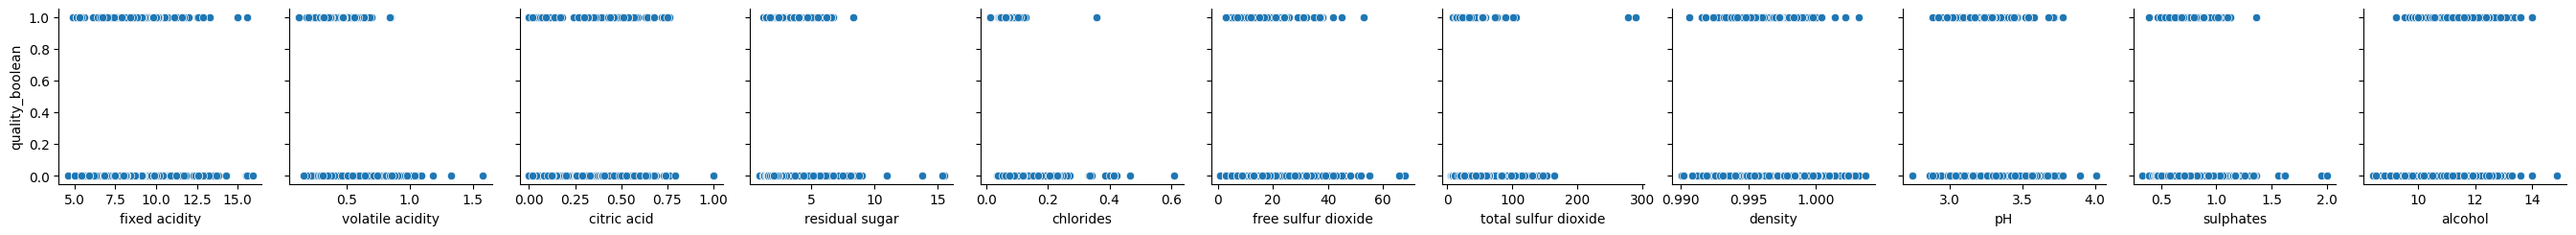

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.PairGrid(df_wine_qt, x_vars=X.columns, y_vars=['quality_boolean'])
g.map(sns.scatterplot)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.75, random_state=20)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

def model_test_summary(n_estimators, max_depth):
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred_gbc = gbc.predict(x_test)

    print('Report For N Estimators: ', n_estimators, ', Max Depth: ', max_depth)
    conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
    print('conf_matrix_gbc: ')
    print(conf_matrix_gbc)
    class_report_gbc = classification_report(y_test, y_pred_gbc)
    print('class_report_gbc: ')
    print(class_report_gbc)

    feature_importances = gbc.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(6, 4))
    plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance in Predicting Wine Quality')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Report For N Estimators:  150 , Max Depth:  2
conf_matrix_gbc: 
[[190   9]
 [ 17  13]]
class_report_gbc: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       199
           1       0.59      0.43      0.50        30

    accuracy                           0.89       229
   macro avg       0.75      0.69      0.72       229
weighted avg       0.88      0.89      0.88       229



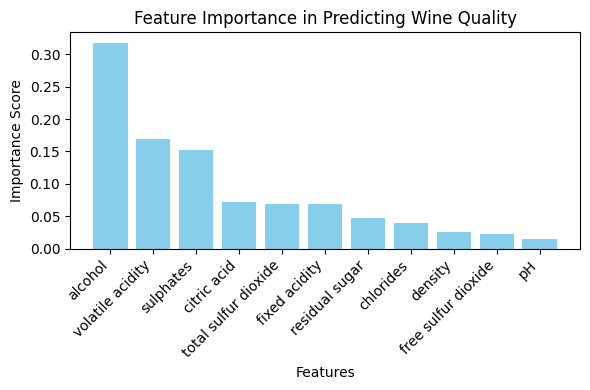

Report For N Estimators:  150 , Max Depth:  4
conf_matrix_gbc: 
[[187  12]
 [ 14  16]]
class_report_gbc: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       199
           1       0.57      0.53      0.55        30

    accuracy                           0.89       229
   macro avg       0.75      0.74      0.74       229
weighted avg       0.88      0.89      0.88       229



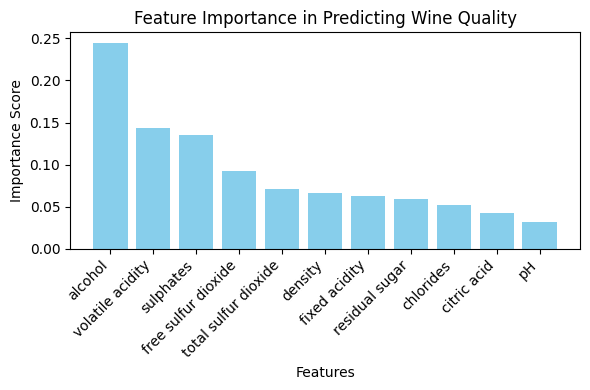

Report For N Estimators:  150 , Max Depth:  6
conf_matrix_gbc: 
[[186  13]
 [ 15  15]]
class_report_gbc: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       199
           1       0.54      0.50      0.52        30

    accuracy                           0.88       229
   macro avg       0.73      0.72      0.72       229
weighted avg       0.87      0.88      0.88       229



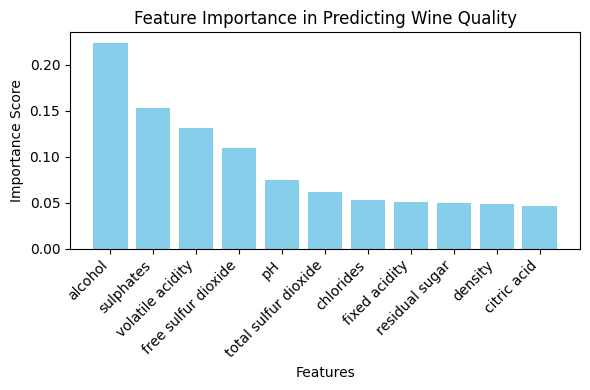

In [65]:
n_estimators = 150
max_depth_list = [2, 4, 6]

for max_depth in max_depth_list:
    model_test_summary(n_estimators, max_depth)

# 3. Gradient Boosting with Early Stopping on Breast Cancer Dataset
    o Dataset: Use the Breast Cancer Dataset from sklearn.datasets.
    o Tasks:
        1. Load the Breast Cancer dataset and split it into training, validation, and testing sets (60% train, 20% validation, 20% test).
        2. Train a Gradient Boosting Classifier with n_estimators=500 and learning_rate=0.1, using the validation set for early stopping.
        3. Use early stopping criteria based on validation accuracy with a patience of 20 rounds.
        4. Compare the test accuracy, F1-score, and number of iterations with and without early stopping.
        5. Summarize the effect of early stopping on performance and training time.